In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
import matplotlib.colors as colors

def get_skin_depth(rho,frequency=100000):
    return (rho/(3.947841760435743e-06 *frequency))**.5

def find_errorbound(a,rho_og,freq,error = 0.5):
    rk_og = (1-1j)*a/get_skin_depth(rho_og,freq)
    chi = np.angle(2/rk_og*jv(1,rk_og)/jv(0,rk_og)-1)
    rhos = np.logspace(-8,-3,100)
    chis = np.zeros(len(rhos),dtype=np.float64)
    
    for i, rho in enumerate(rhos):
        rk =(1-1j)*a/get_skin_depth(rho,freq)
        chis[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
    return np.interp([chi-error*np.pi/180,chi+error*np.pi/180],chis,rhos) #error is in units of degrees



Display Phase for a single frequency given sample size and resisitivity

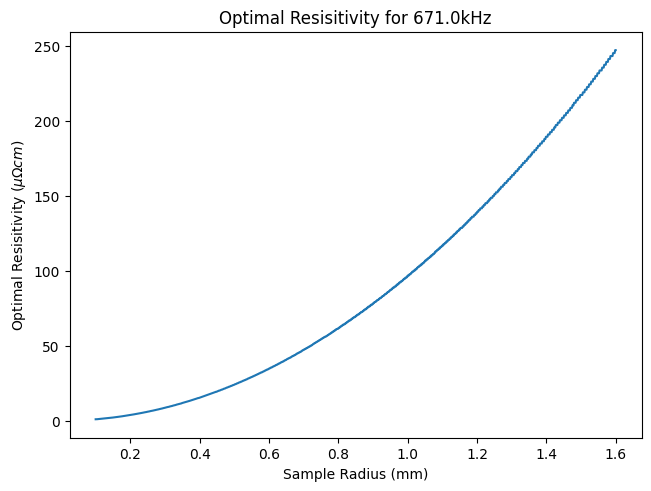

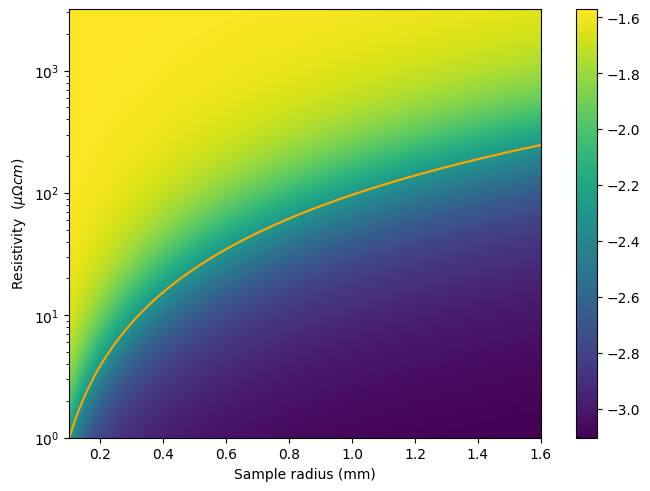

In [82]:

a = np.linspace(1e-4,1.6e-3,1000)#this is the range of radii that the probe can handle
freq = 671e3
rhos = np.logspace(-8,-4.5,1000)
best_rhos = np.zeros(len(a),dtype=np.float64)
# steepest = np.zeros(len(a),dtype=np.float64)
phases = np.zeros([len(rhos),len(a)],dtype=np.float64)
for j, r in enumerate(a):
    chis3 = np.zeros(len(rhos),dtype=np.float64)
    for i, rho in enumerate(rhos):
        rk =(1-1j)*r/get_skin_depth(rho,freq)
        chis3[i] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
        phases[i][j] = chis3[i]
    best_rhos[j] = rhos[np.argmax(abs(np.gradient(chis3)))]
    # fig2 = plt.figure(constrained_layout = True)
    # cx = fig2.add_subplot(1, 1, 1)
    # cx.plot(chis3,rhos*1e8)
    # cx.set_yscale('log')
    # cx.set_ylabel(r'Resistivity ($\mu \Omega cm$)',fontsize = 15)
    # cx.set_xlabel(r'Phase of Magnetic Susceptibility $\chi$ (rad)',fontsize = 15)
    # cx.set_title(r'Resistivity versus Phase of $\chi$ for 1 mm$^2$ Samples',fontsize = 18)
    # plt.show()

fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(a*1e3,best_rhos*1e8)
ax.set_xlabel('Sample Radius (mm)')
ax.set_ylabel(r'Optimal Resisitivity ($\mu \Omega cm$)')
ax.set_title('Optimal Resisitivity for '+str(round(freq*1e-3,3))+ 'kHz')

fig2 = plt.figure(constrained_layout = True)
bx = fig2.add_subplot(1, 1, 1)

p1 = bx.pcolormesh(a*1e3, rhos*1e8, phases)#,vmin=-np.pi, vmax=-np.pi/2)
# p1 = bx.imshow(phases,extent=[a[0]*1e3, a[-1]*1e3, rhos[0]*1e8, rhos[-1]*1e8], aspect='auto',vmin=-np.pi, vmax=-np.pi/2,origin='lower')#,norm=colors.LogNorm(vmin=phases.min(), vmax=phases.max()))
fig2.colorbar(p1, ax=bx)
bx.set_ylabel(r'Resistivity  ($\mu \Omega cm$)')
bx.set_xlabel('Sample radius (mm)')
bx.set_yscale('log')
_ = bx.plot(a*1e3,best_rhos*1e8,c='orange')



Display optimal frequency for given sample size and resistance

C:\Users\blake\AppData\Local\Temp\ipykernel_19832\2099437718.py:37: RuntimeWarning: invalid value encountered in cdouble_scalars
  chis3[k] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)


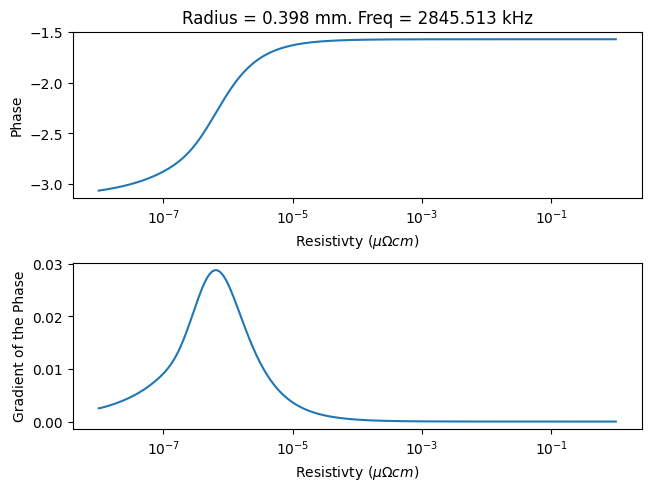

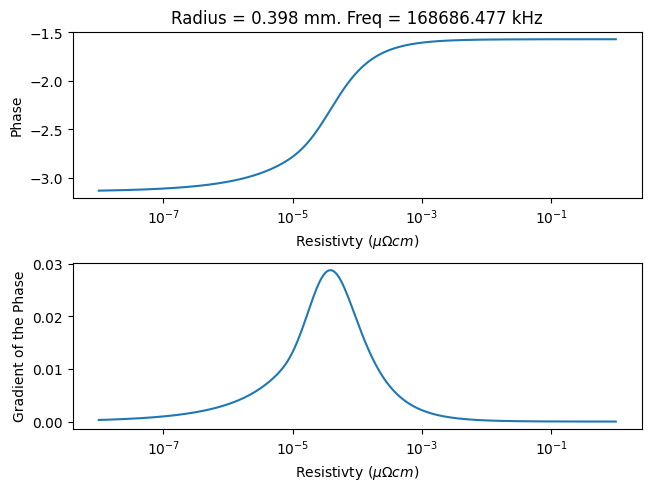

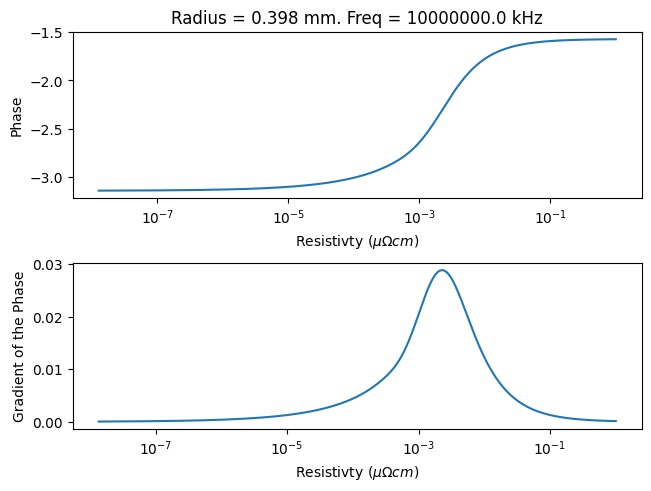

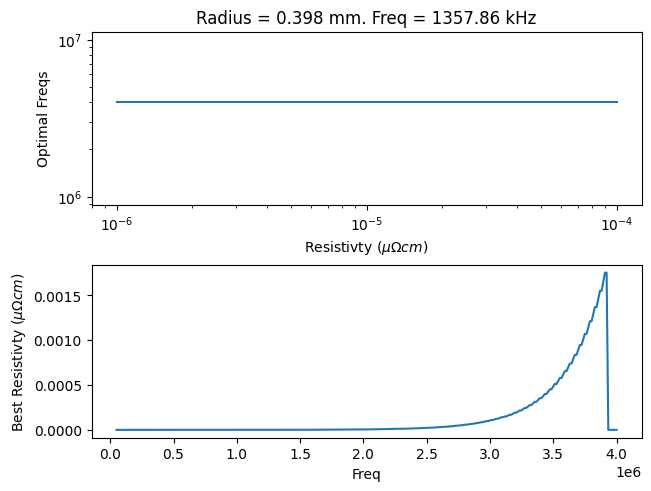

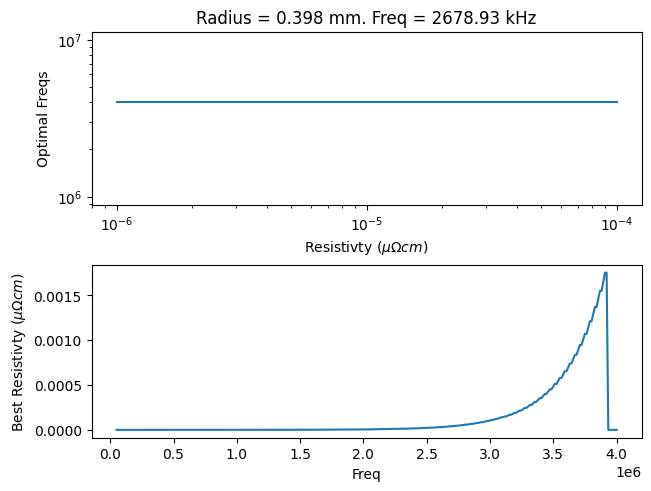

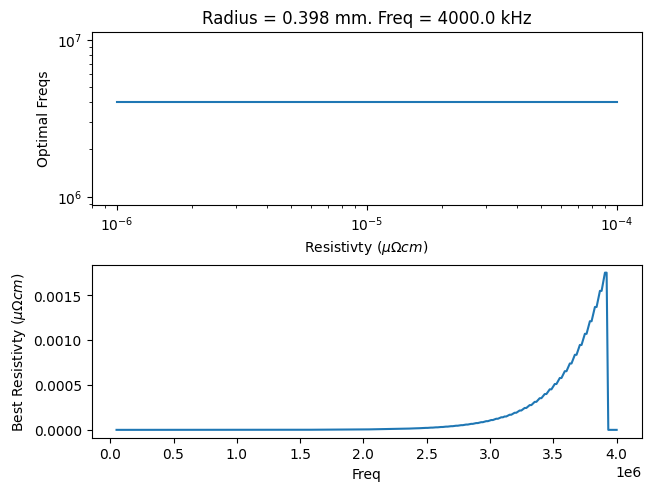

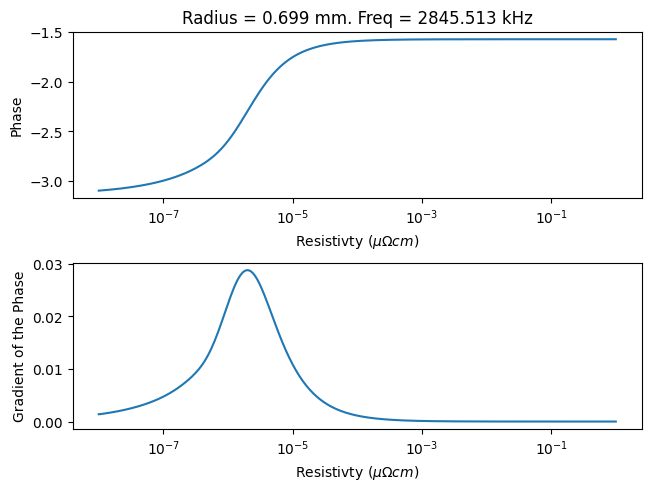

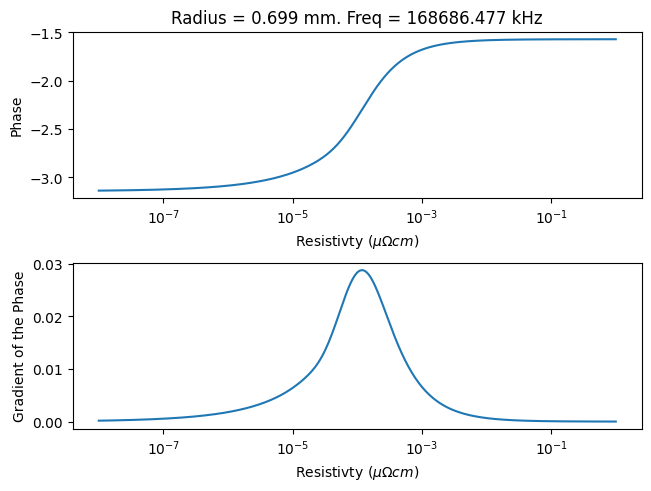

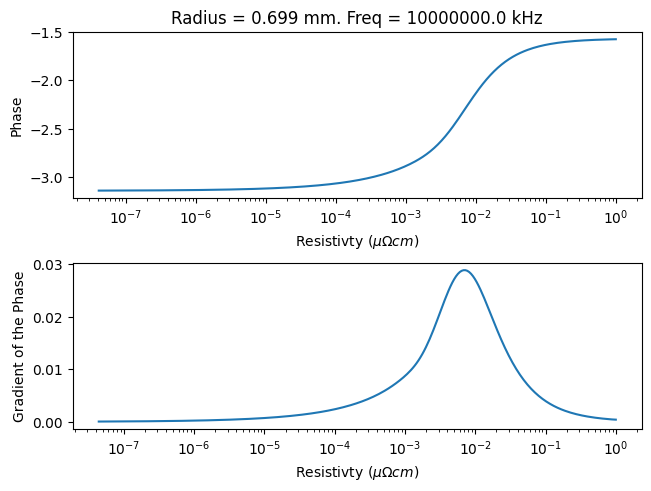

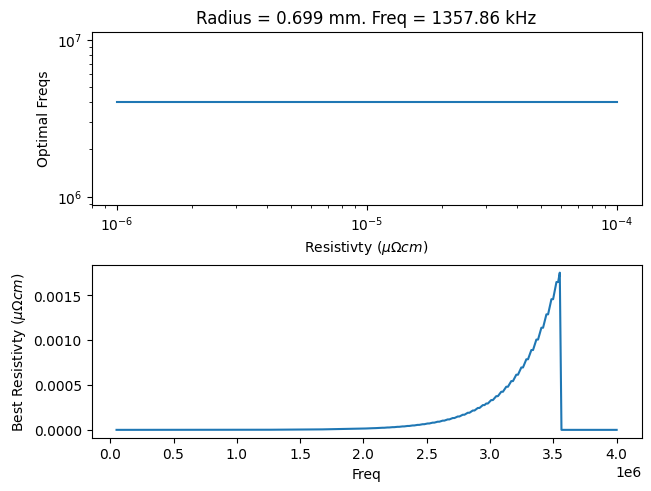

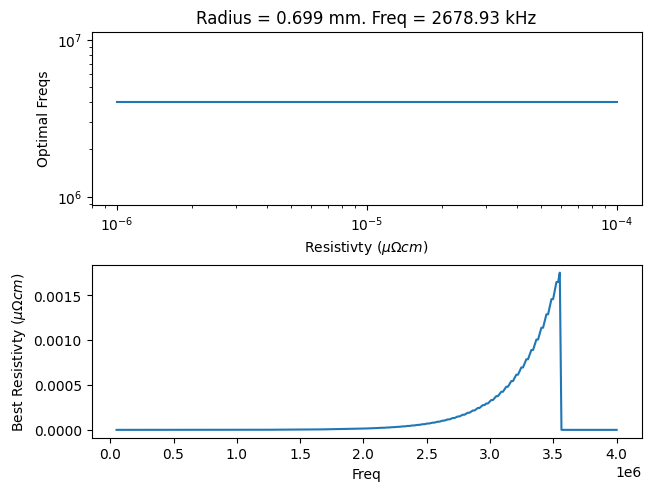

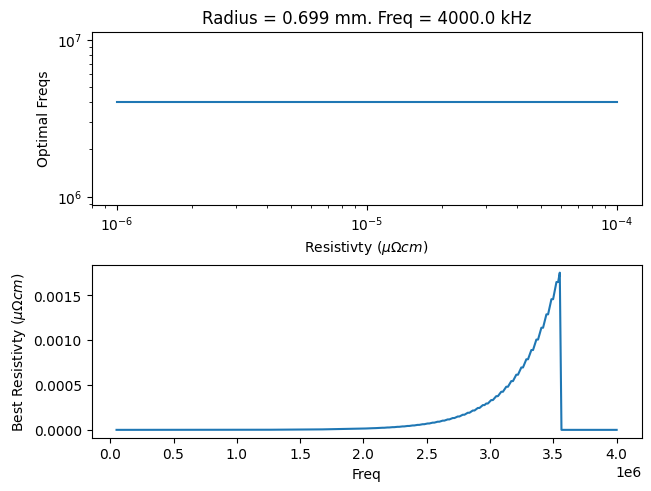

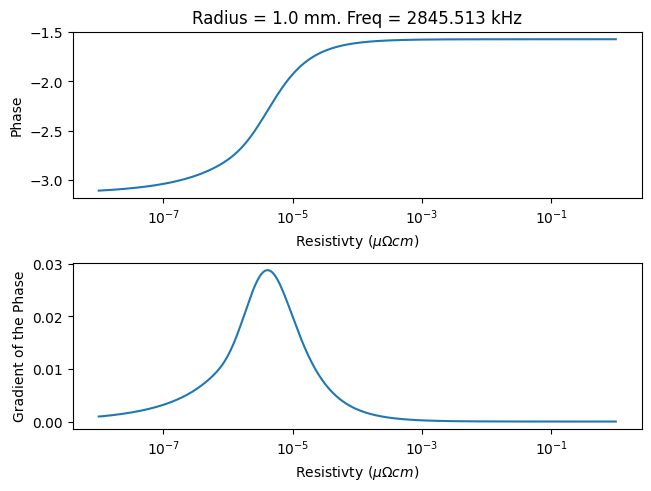

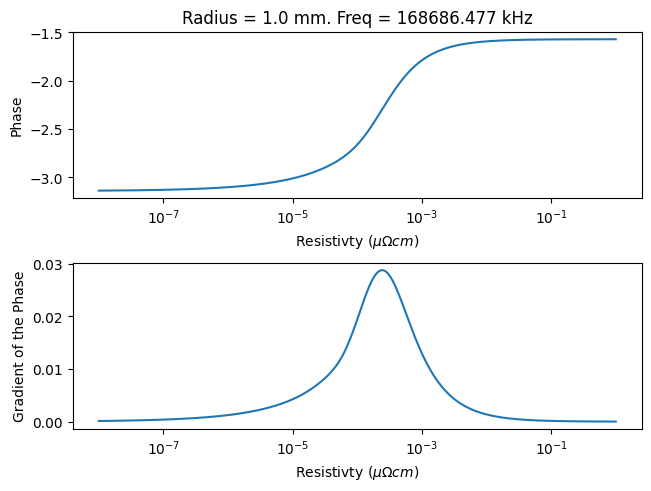

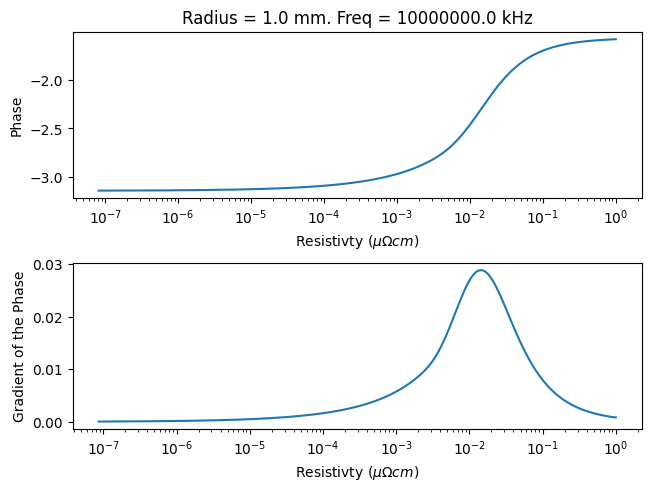

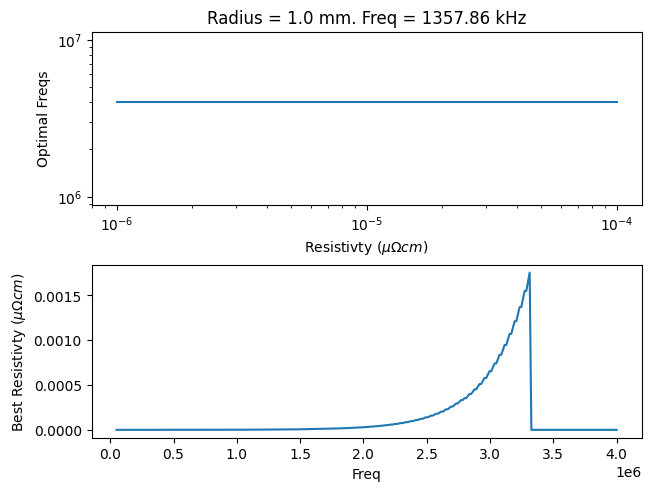

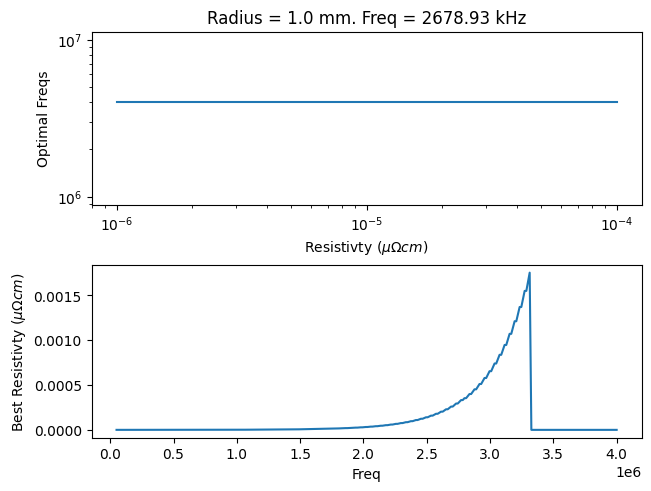

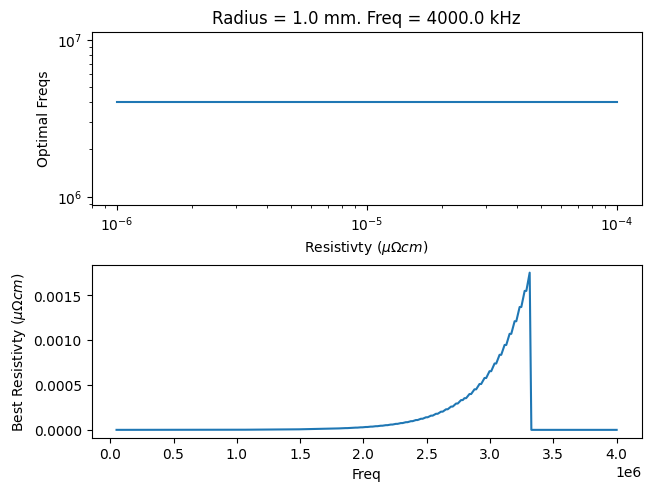

In [93]:
# I want a plot that has size on x, resistiivity on y, and optimal freq on colorplot
rho_res = 300
a_res = 300
freq_res = 300
num_of_chi_plots_a = 3
num_of_chi_plots_freq = 3
rhos2 = np.logspace(-8,-3,rho_res)
rho_display = np.logspace(-6,-4,rho_res)
a = np.linspace(1e-4,1e-3,a_res)#this is roughly the range of radii that the probe can handle
# freqs = np.linspace(5e4,4e6,freq_res)
freqs = np.logspace(np.log10(5e4),np.log10(1e8),freq_res)
freqs_display = np.linspace(5e4,4e6,freq_res)
best_rhos = np.zeros([a_res,freq_res],dtype=np.float64)
best_freqs = np.zeros([a_res,rho_res],dtype=np.float64)


if num_of_chi_plots_a == 0:
    denom_a = a_res+1
else:
    denom_a = a_res//num_of_chi_plots_a
if num_of_chi_plots_freq == 0:
    denom_freq = freq_res+1
else:
    denom_freq = freq_res//num_of_chi_plots_freq

#clear old plots
try:
    plt.close()
except:
    pass

for i, r in enumerate(a):
    for j, freq in enumerate(freqs):
        chis3 = np.zeros(len(rhos2),dtype=np.float64)
        for k, rho in enumerate(rhos2):
            rk =(1-1j)*r/get_skin_depth(rho,freq)
            chis3[k] = np.angle(2/rk*jv(1,rk)/jv(0,rk)-1)
        best_rhos[i][j] = rhos2[np.argmax(abs(np.gradient(chis3)))] # this find the steepest change of the phase as a best rho
        if i%denom_a == denom_a-1 and j%denom_freq == denom_freq-1: #see if freq ranges are appropiate
            fig = plt.figure(constrained_layout = True)
            ax = fig.add_subplot(2, 1, 1)
            ax.plot(rhos2,chis3)
            ax.set_xlabel(r'Resistivty ($\mu \Omega cm$)')
            ax.set_xscale('log')
            ax.set_ylabel('Phase')
            ax.set_title('Radius = '+str(round(r*1e3,3))+' mm. Freq = '+str(round(freq*1e-3,3))+' kHz')
            bx = fig.add_subplot(2, 1, 2)
            bx.plot(rhos2,np.gradient(chis3))
            bx.set_xlabel(r'Resistivty ($\mu \Omega cm$)')
            bx.set_xscale('log')
            bx.set_ylabel('Gradient of the Phase')
    freq_row = np.interp(rho_display,best_rhos[i],freqs_display)
    for j in range(freq_res):
        best_freqs[i][j] = freq_row[j]
        if i%denom_a == denom_a-1 and j%denom_freq == denom_freq-1: #see if freq ranges are appropiate
            fig = plt.figure(constrained_layout = True)
            ax = fig.add_subplot(2, 1, 1)
            ax.plot(rho_display,freq_row)
            ax.set_xlabel(r'Resistivty ($\mu \Omega cm$)')
            ax.set_xscale('log')
            ax.set_ylabel('Optimal Freqs')
            ax.set_yscale('log')
            ax.set_title('Radius = '+str(round(r*1e3,3))+' mm. Freq = '+str(round(freqs_display[j]*1e-3,3))+' kHz')
            bx = fig.add_subplot(2, 1, 2)
            bx.plot(freqs_display,best_rhos[i])
            bx.set_ylabel(r'Best Resistivty ($\mu \Omega cm$)')
            # bx.set_yscale('log')
            bx.set_xlabel('Freq')
rho_at_freq_671 = np.linspace(1e-4,1.6e-3,a_res)
for i in range(a_res):
    rho_at_freq_671[i] = np.interp([671e3],freqs,best_rhos[i])


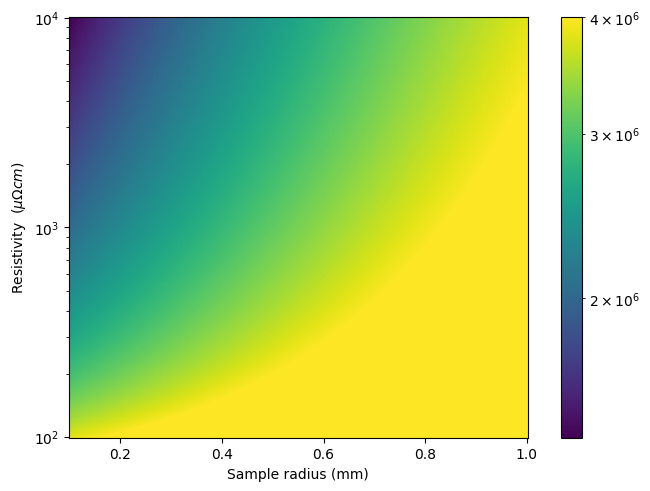

In [92]:
fig2 = plt.figure(constrained_layout = True)
bx = fig2.add_subplot(1, 1, 1)
p1 = bx.pcolormesh(a*1e3, rho_display*1e8, best_freqs, norm = colors.LogNorm())
fig2.colorbar(p1, ax=bx)
bx.set_ylabel(r'Resistivity  ($\mu \Omega cm$)')
bx.set_xlabel('Sample radius (mm)')
bx.set_yscale('log')
# _=bx.plot(a*1e3,1e8*rho_at_freq_671)

In [20]:
# bottom = np.zeros(len(a))
# top = np.zeros(len(a))
# Hg_t = np.zeros(len(a))
# Hg_b = np.zeros(len(a))
# for i in range(len(a)):
#     # data = find_errorbound(a[i],best_rhos[i])
#     # bottom[i] = data[0]
#     # top[i] = data[1]
#     Hg_data = find_errorbound(a[i],1e-5,freq)
#     Hg_b[i] = Hg_data[0]
#     Hg_t[i] = Hg_data[1]
# inds = np.logical_not(a<3.5e-3)